<a href="https://colab.research.google.com/github/priyanka2454/AML/blob/main/AML-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 658ms/step - accuracy: 0.5079 - loss: 0.6916 - val_accuracy: 0.5027 - val_loss: 0.6939
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 687ms/step - accuracy: 0.5942 - loss: 0.6765 - val_accuracy: 0.5027 - val_loss: 0.6973
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 647ms/step - accuracy: 0.5795 - loss: 0.6633 - val_accuracy: 0.5027 - val_loss: 0.7031
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 680ms/step - accuracy: 0.5748 - loss: 0.6396 - val_accuracy: 0.5027 - val_loss: 0.7056
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 667ms/step - accuracy: 0.5186 - loss: 0.6210 - val_accuracy: 0.5027 - val_loss: 0.7133
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 676ms/step - accuracy: 0.6657 - loss: 0.4929 - val_accuracy: 0.5282 - val_loss: 0.6988
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 643ms/step - accuracy: 0.9494 - loss: 0.4108 - val_accuracy: 0.5488 - val_loss: 0.7739
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 663ms/step - accuracy: 0.9616 - loss: 0.2318 - val_accuracy: 0.6009 - val_loss:

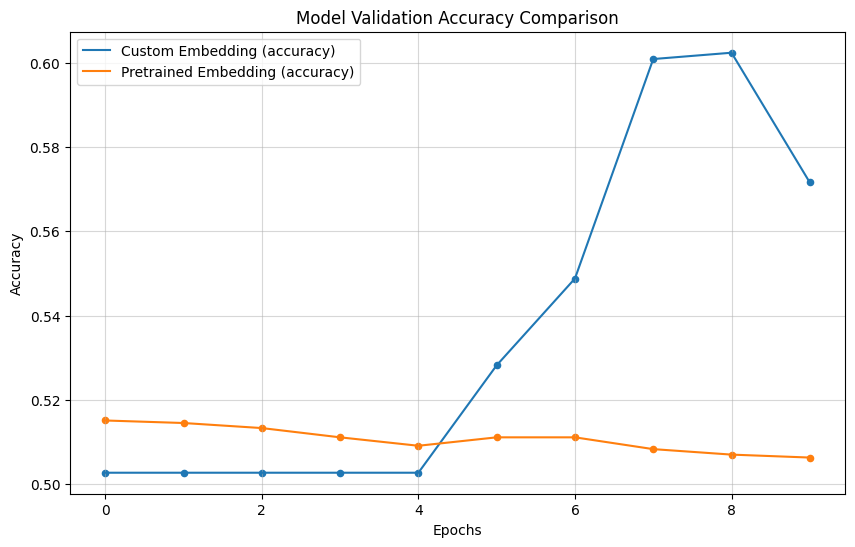

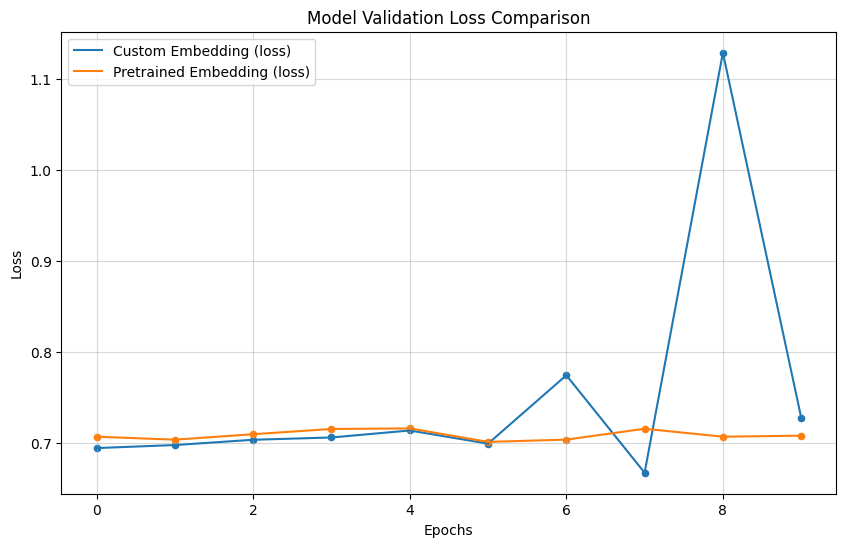

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5674 - loss: 0.6922 - val_accuracy: 0.5029 - val_loss: 0.6937
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5608 - loss: 0.6810 - val_accuracy: 0.5027 - val_loss: 0.6952
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5508 - loss: 0.6708 - val_accuracy: 0.5027 - val_loss: 0.6981
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6487 - loss: 0.6479 - val_accuracy: 0.5027 - val_loss: 0.7049
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5882 - loss: 0.6357 - val_accuracy: 0.5027 - val_loss: 0.7169
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5820 - loss: 0.6202 - val_accuracy: 0.5027 - val_loss: 0.7344
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5778 - loss: 0.5972 - val_accuracy: 0.5027 - val_loss: 0.7533
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6908 - loss: 0.5662 - val_accuracy: 0.5027 - val_loss: 0.7449
Epoch 9/10
4/4 ━

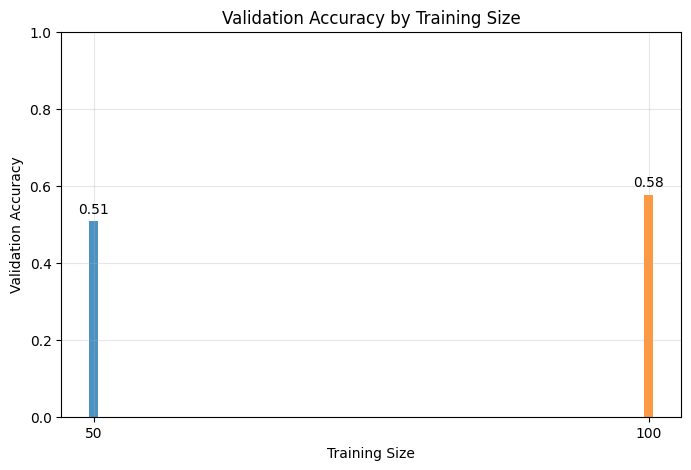

Training Size: 50, Validation Accuracy: 0.5090
Training Size: 100, Validation Accuracy: 0.5770


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Configuration
VOCAB_SIZE = 10000  # Top 10,000 words
MAX_SEQUENCE_LENGTH = 150  # Maximum words per review
EMBEDDING_DIM = 50  # Embedding dimensions
EPOCHS = 10
BATCH_SIZE = 16

# Load IMDB dataset
(train_reviews, train_labels), (test_reviews, test_labels) = imdb.load_data(num_words=VOCAB_SIZE)

# Restrict training data to 100 samples
train_reviews, train_labels = train_reviews[:100], train_labels[:100]

# Use 10,000 samples for validation
val_reviews, val_labels = test_reviews[:10000], test_labels[:10000]

train_padded = pad_sequences(train_reviews, maxlen=MAX_SEQUENCE_LENGTH)
val_padded = pad_sequences(val_reviews, maxlen=MAX_SEQUENCE_LENGTH)

def create_custom_embedding_model():
    inputs = Input(shape=(MAX_SEQUENCE_LENGTH,))
    x = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(inputs)
    x = Bidirectional(LSTM(32))(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def load_glove(filepath):
    embeddings = {}
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings[word] = coefs
    return embeddings

def create_embedding_matrix(word_index, glove_dict, vocab_size, embedding_dim):
    matrix = np.zeros((vocab_size, embedding_dim))
    for word, index in word_index.items():
        if index < vocab_size:
            embedding_vector = glove_dict.get(word)
            if embedding_vector is not None:
                matrix[index] = embedding_vector
    return matrix
GLOVE_PATH = '/glove.6B.50d.txt'
glove_embeddings = load_glove(GLOVE_PATH)
word_index = imdb.get_word_index()
embedding_matrix = create_embedding_matrix(word_index, glove_embeddings, VOCAB_SIZE, EMBEDDING_DIM)

def create_pretrained_embedding_model():
    inputs = Input(shape=(MAX_SEQUENCE_LENGTH,))
    x = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, weights=[embedding_matrix],
                  input_length=MAX_SEQUENCE_LENGTH, trainable=False)(inputs)
    x = Bidirectional(LSTM(32))(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

custom_model = create_custom_embedding_model()
history_custom = custom_model.fit(train_padded, np.array(train_labels), epochs=EPOCHS, batch_size=BATCH_SIZE,
                                  validation_data=(val_padded, np.array(val_labels)))

pretrained_model = create_pretrained_embedding_model()
history_pretrained = pretrained_model.fit(train_padded, np.array(train_labels), epochs=EPOCHS, batch_size=BATCH_SIZE,
                                          validation_data=(val_padded, np.array(val_labels)))

def plot_model_performance(histories, labels, metric):
    plt.figure(figsize=(10, 6))
    colors = ['#1f77b4', '#ff7f0e']
    for i, history in enumerate(histories):
        plt.plot(history.history[f'val_{metric}'], label=f'{labels[i]} ({metric})', color=colors[i], linestyle='-')
        plt.scatter(range(EPOCHS), history.history[f'val_{metric}'], color=colors[i], s=20)
    plt.title(f'Model Validation {metric.capitalize()} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

plot_model_performance([history_custom, history_pretrained], ['Custom Embedding', 'Pretrained Embedding'], 'accuracy')
plot_model_performance([history_custom, history_pretrained], ['Custom Embedding', 'Pretrained Embedding'], 'loss')

training_sizes = [50, 100]
validation_results = {}

for size in training_sizes:
    partial_train_padded = train_padded[:size]
    partial_train_labels = np.array(train_labels[:size])

    temp_model = create_custom_embedding_model()
    temp_history = temp_model.fit(partial_train_padded, partial_train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE,
                                  validation_data=(val_padded, np.array(val_labels)))

    validation_results[size] = temp_history.history['val_accuracy'][-1]

def plot_training_size_performance(results):
    plt.figure(figsize=(8, 5))
    sizes = list(results.keys())
    accuracies = list(results.values())
    plt.bar(sizes, accuracies, color=['#1f77b4', '#ff7f0e'], alpha=0.8)
    for i, acc in enumerate(accuracies):
        plt.text(sizes[i], acc + 0.02, f'{acc:.2f}', ha='center', fontsize=10)
    plt.title('Validation Accuracy by Training Size')
    plt.xlabel('Training Size')
    plt.ylabel('Validation Accuracy')
    plt.xticks(sizes)
    plt.ylim(0, 1)
    plt.grid(alpha=0.3)
    plt.show()

plot_training_size_performance(validation_results)

for size, acc in validation_results.items():
    print(f"Training Size: {size}, Validation Accuracy: {acc:.4f}")


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 150
x_val_pad = pad_sequences(val_reviews, maxlen=MAX_SEQUENCE_LENGTH)

def evaluate_model(model, x_val, y_val, model_name):
    y_pred = model.predict(x_val)

    y_pred_binary = (y_pred > 0.5).astype(int)

    mse = mean_squared_error(y_val, y_pred_binary)
    rmse = np.sqrt(mse)

    print(f"{model_name} Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("-" * 40)

    return mse, rmse


mse_custom, rmse_custom = evaluate_model(custom_model, x_val_pad, val_labels, "Custom Embedding Model")

mse_pretrained, rmse_pretrained = evaluate_model(pretrained_model, x_val_pad, val_labels, "Pretrained Embedding Model")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Custom Embedding Model Evaluation:
Mean Squared Error (MSE): 0.4284
Root Mean Squared Error (RMSE): 0.6545
----------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Pretrained Embedding Model Evaluation:
Mean Squared Error (MSE): 0.4937
Root Mean Squared Error (RMSE): 0.7026
----------------------------------------
